In [91]:
import json
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
api_k = "27402f292d175bd186ff4ad89771bcb3"
city = "Sligo"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&cnt=240&appid={api_k}&units=metric"
response = requests.get(url)

In [93]:
response

<Response [200]>

In [94]:
if response.status_code == 200:
    data = response.json()
    weather_data = []
    for hour in data['list']:
        date_time = hour['dt_txt']
        temp = hour['main']['temp']
        feels_like = hour['main']['feels_like']
        temp_min = hour['main']['temp_min']
        temp_max = hour['main']['temp_max']
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main =hour['weather'][0]['main']
        weather_desc = hour['weather'][0]['description']
        cloud = hour['clouds']['all']
        wind_speed = hour['wind']['speed']
        wind_dir = hour['wind']['deg']
        rain = hour.get('rain',{}).get("3h",0)
        snow = hour.get('snow',{}).get("3h",0)

        weather_data.append({
            "DateTime" : date_time,
            "temp" : temp,
            "feels_like":feels_like,
            "temp_min":temp_min,
            "temp_max":temp_max,
            "pressure":pressure,
            "humidity":humidity,
            "weather_main":weather_main,
            "weather_desc":weather_desc,
            "cloud":cloud,
            "wind_speed":wind_speed,
            "wind_dir":wind_dir,
            "rain":rain,
            "snow":snow
        })
        df = pd.DataFrame(weather_data)
else:
    print(response.status_code)

df.head()
            
            
        

,DateTime,temp,feels_like,temp_min,temp_max,pressure,humidity,weather_main,weather_desc,cloud,wind_speed,wind_dir,rain,snow
0,2025-02-21 15:00:00,10.19,9.38,10.19,10.65,988,81,Rain,light rain,71,6.72,214,0.31,0
1,2025-02-21 18:00:00,8.77,5.15,8.17,8.77,991,85,Rain,light rain,66,7.71,193,0.38,0
2,2025-02-21 21:00:00,7.92,3.68,7.92,7.92,995,85,Clouds,broken clouds,51,9.09,192,0.00,0
3,2025-02-22 00:00:00,8.11,3.72,8.11,8.11,996,81,Clouds,broken clouds,64,9.95,198,0.00,0
4,2025-02-22 03:00:00,7.77,4.12,7.77,7.77,998,85,Rain,light rain,80,6.86,210,0.13,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DateTime      40 non-null     object 
 1   temp          40 non-null     float64
 2   feels_like    40 non-null     float64
 3   temp_min      40 non-null     float64
 4   temp_max      40 non-null     float64
 5   pressure      40 non-null     int64  
 6   humidity      40 non-null     int64  
 7   weather_main  40 non-null     object 
 8   weather_desc  40 non-null     object 
 9   cloud         40 non-null     int64  
 10  wind_speed    40 non-null     float64
 11  wind_dir      40 non-null     int64  
 12  rain          40 non-null     float64
 13  snow          40 non-null     int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 4.5+ KB


In [96]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [97]:
df.head()

,DateTime,temp,feels_like,temp_min,temp_max,pressure,humidity,weather_main,weather_desc,cloud,wind_speed,wind_dir,rain,snow
0,2025-02-21 15:00:00,10.19,9.38,10.19,10.65,988,81,Rain,light rain,71,6.72,214,0.31,0
1,2025-02-21 18:00:00,8.77,5.15,8.17,8.77,991,85,Rain,light rain,66,7.71,193,0.38,0
2,2025-02-21 21:00:00,7.92,3.68,7.92,7.92,995,85,Clouds,broken clouds,51,9.09,192,0.00,0
3,2025-02-22 00:00:00,8.11,3.72,8.11,8.11,996,81,Clouds,broken clouds,64,9.95,198,0.00,0
4,2025-02-22 03:00:00,7.77,4.12,7.77,7.77,998,85,Rain,light rain,80,6.86,210,0.13,0


In [98]:
df["Day"]=df["DateTime"].dt.date
df["Hour"]=df["DateTime"].dt.hour
df_p = df.pivot(index="Day",columns="Hour",values="temp")

In [99]:
df_p

Hour,0,3,6,9,12,15,18,21
Day,,,,,,,,
2025-02-21,NaN,NaN,NaN,NaN,NaN,10.19,8.77,7.92
2025-02-22,8.11,7.77,6.80,7.37,9.30,9.77,7.59,6.72
2025-02-23,6.49,8.76,8.76,10.75,11.44,11.17,9.29,8.51
2025-02-24,7.66,6.85,6.40,6.63,9.09,8.91,6.30,4.30
2025-02-25,4.34,6.71,5.01,5.62,7.70,7.63,5.30,3.55
2025-02-26,4.97,5.91,4.16,4.72,5.77,NaN,NaN,NaN


In [100]:
avg_temp = df["temp"].mean()

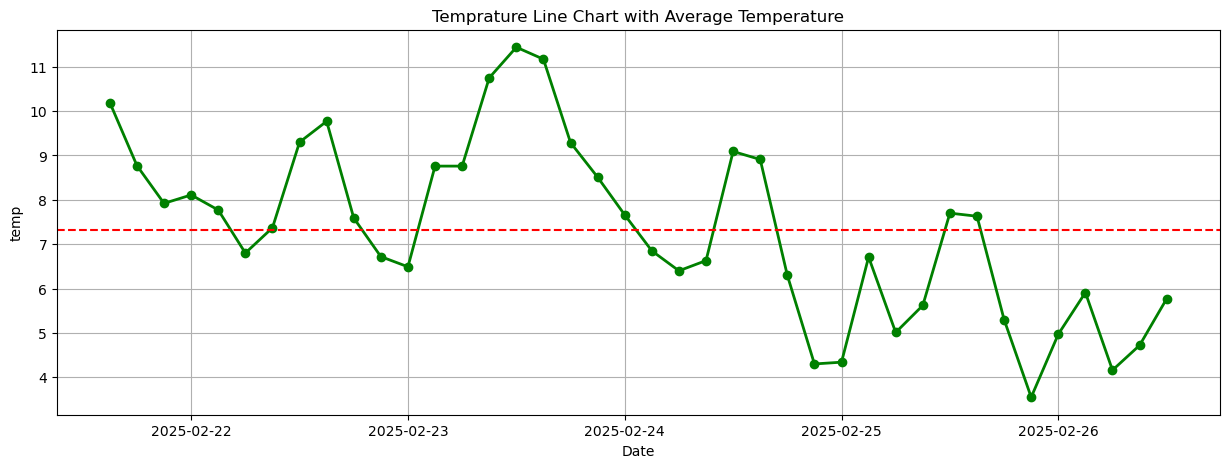

In [101]:
plt.figure(figsize=(15,5))
plt.plot(df["DateTime"],df["temp"],color="green",linestyle='-',linewidth=2,marker='o')
plt.axhline(y=avg_temp,color="red",linestyle='--')
plt.title("Temprature Line Chart with Average Temperature")
plt.xlabel("Date")
plt.ylabel("temp")
plt.grid(True)
plt.show()

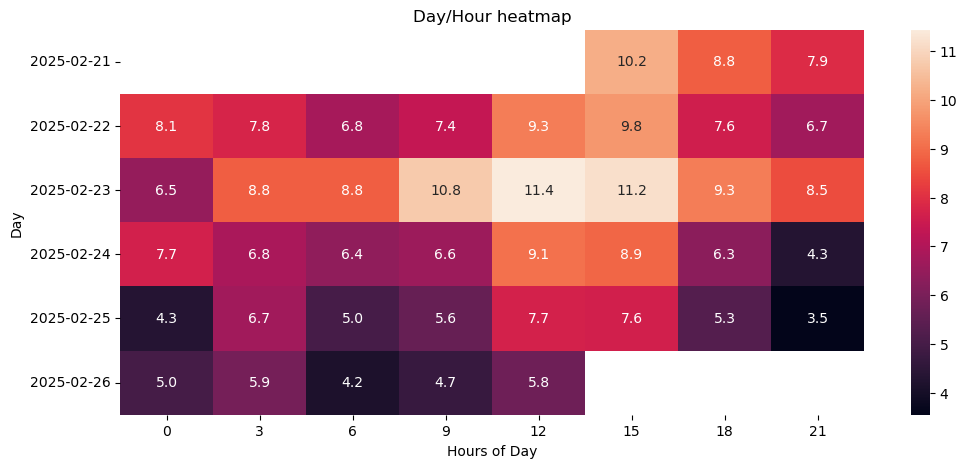

In [102]:
plt.figure(figsize=(12,5))
sns.heatmap(df_p, annot=True,fmt=".1f")
plt.title("Day/Hour heatmap")
plt.xlabel("Hours of Day")
plt.ylabel("Day")
plt.show()

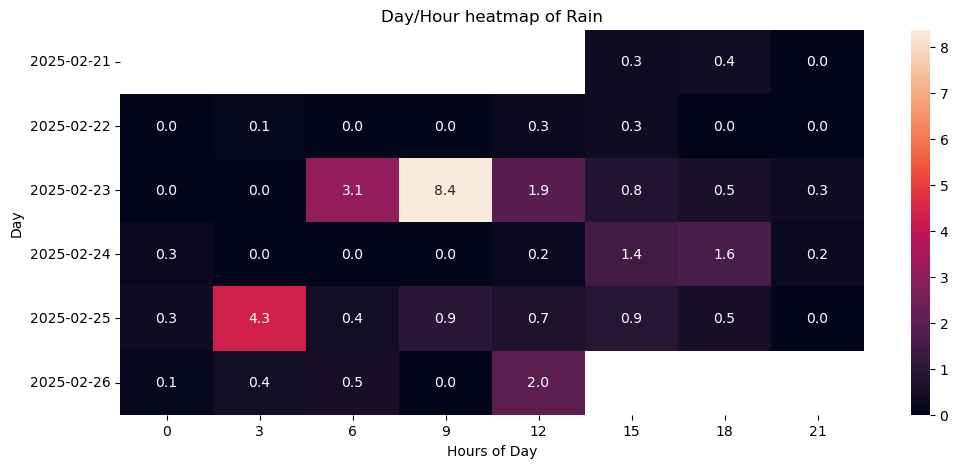

In [104]:

df_p1 = df.pivot(index="Day",columns="Hour",values="rain")
plt.figure(figsize=(12,5))
sns.heatmap(df_p1, annot=True,fmt=".1f")
plt.title("Day/Hour heatmap of Rain")
plt.xlabel("Hours of Day")
plt.ylabel("Day")
plt.show()

In [105]:
import psycopg2
from sqlalchemy import create_engine

In [106]:
db_username = "postgres"
db_password = "Amritha@123".replace("@","%40")
db_host = "localhost"
db_port = 5432
db_name = "Weather_Data"

In [107]:
engine = create_engine(f"postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}")

In [108]:
table_name="weather"
df.to_sql(table_name,engine,if_exists="replace",index=False)
engine.dispose()